# A/B Testing of a Website Themes 

In this project, statistics collected from a website are analyzed to determine which theme performs better through an A/B test.By leveraging the power of A/B testing and statistical analysis, this project aims to optimize user experience and drive tangible improvements in website effectiveness and conversion rates

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats

In [2]:
df = pd.read_csv("website_ab_test.csv")
df.head()

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No


In [3]:
df.isnull().sum()

Theme                 0
Click Through Rate    0
Conversion Rate       0
Bounce Rate           0
Scroll_Depth          0
Age                   0
Location              0
Session_Duration      0
Purchases             0
Added_to_Cart         0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Theme               1000 non-null   object 
 1   Click Through Rate  1000 non-null   float64
 2   Conversion Rate     1000 non-null   float64
 3   Bounce Rate         1000 non-null   float64
 4   Scroll_Depth        1000 non-null   float64
 5   Age                 1000 non-null   int64  
 6   Location            1000 non-null   object 
 7   Session_Duration    1000 non-null   int64  
 8   Purchases           1000 non-null   object 
 9   Added_to_Cart       1000 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB


In [5]:
df.describe()

,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Session_Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.256048,0.253312,0.505758,50.319494,41.528000,924.999000
std,0.139265,0.139092,0.172195,16.895269,14.114334,508.231723
min,0.010767,0.010881,0.200720,20.011738,18.000000,38.000000
25%,0.140794,0.131564,0.353609,35.655167,29.000000,466.500000
50%,0.253715,0.252823,0.514049,51.130712,42.000000,931.000000
75%,0.370674,0.373040,0.648557,64.666258,54.000000,1375.250000
max,0.499989,0.498916,0.799658,79.997108,65.000000,1797.000000


/Users/ufuk/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

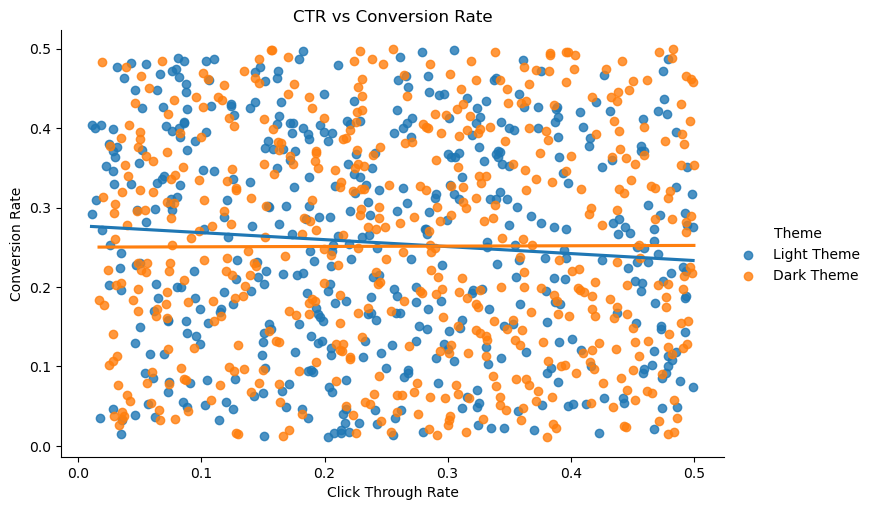

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(data=df, x='Click Through Rate', y='Conversion Rate', hue='Theme', aspect=1.5, ci=None)

plt.title('CTR vs Conversion Rate')
sns.set_palette("dark")
plt.show

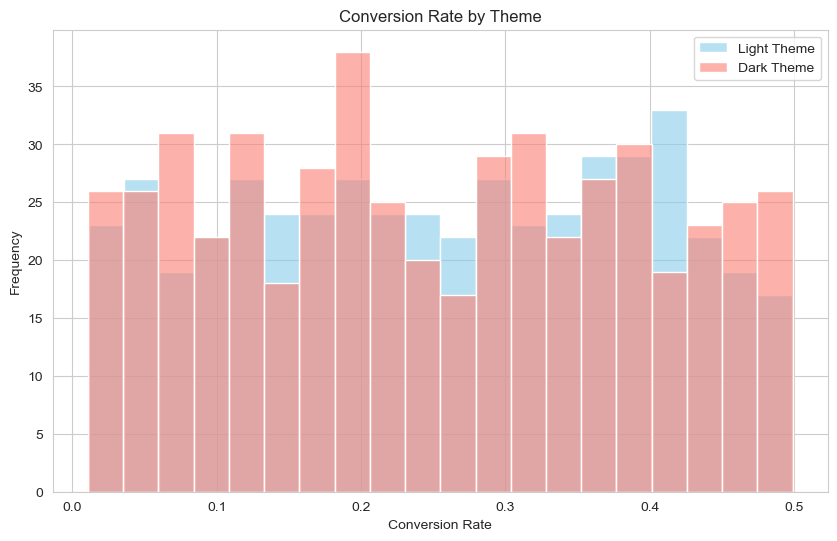

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame creation
# This is an example. Replace it with your actual DataFrame loading or creation code.

# Separate the data into light and dark themes based on the 'Theme' column
light_theme_data = df[df['Theme'] == 'Light Theme']
dark_theme_data = df[df['Theme'] == 'Dark Theme']

# Set the style
sns.set_style("whitegrid")

# Plot histograms for each theme separately
plt.figure(figsize=(10, 6))

# Plot histogram for Light Theme
sns.histplot(light_theme_data, x='Conversion Rate', color='skyblue', label='Light Theme', alpha=0.6, bins=20)

# Plot histogram for Dark Theme
sns.histplot(dark_theme_data, x='Conversion Rate', color='salmon', label='Dark Theme', alpha=0.6, bins=20)

# Add labels and title
plt.title('Conversion Rate by Theme')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')

# Show legend
plt.legend()

# Show the plot
plt.show()


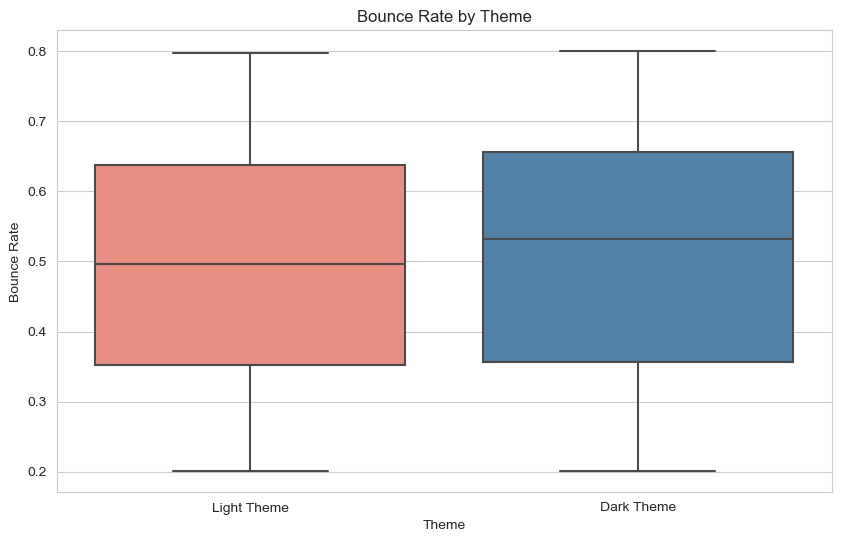

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



light_theme_data = light_theme_data.copy()
dark_theme_data = dark_theme_data.copy()

light_theme_data.loc[:, 'Theme'] = 'Light Theme'
dark_theme_data.loc[:, 'Theme'] = 'Dark Theme'

combined_data = pd.concat([light_theme_data, dark_theme_data])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Theme', y='Bounce Rate', data=combined_data,palette=["salmon", "steelblue"])

plt.title('Bounce Rate by Theme')

plt.show()

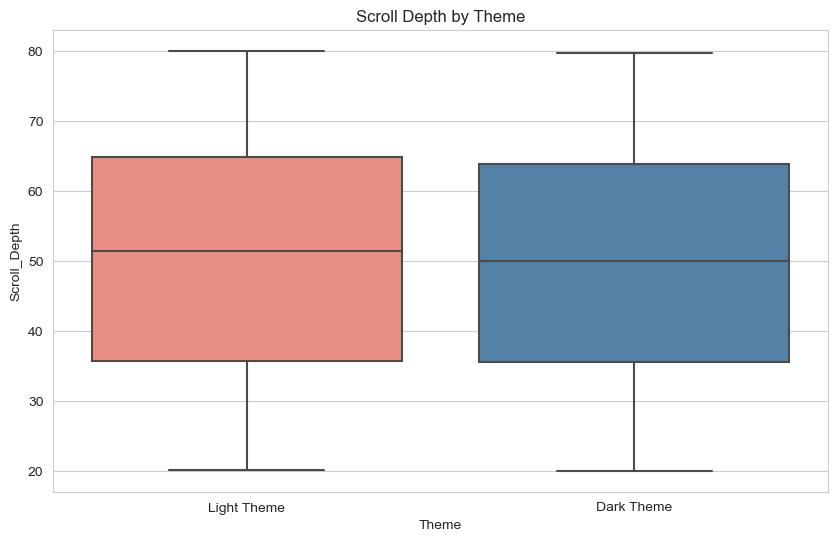

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

light_theme_data = light_theme_data.copy()
dark_theme_data = dark_theme_data.copy()

light_theme_data.loc[:, 'Theme'] = 'Light Theme'
dark_theme_data.loc[:, 'Theme'] = 'Dark Theme'

combined_data = pd.concat([light_theme_data, dark_theme_data])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Theme', y='Scroll_Depth', data=combined_data, palette=["salmon", "steelblue"])

plt.title('Scroll Depth by Theme')

plt.show()


In [10]:
# A/B testing for Purchases
light_theme_conversions = light_theme_data[light_theme_data['Purchases'] == 'Yes'].shape[0]
light_theme_total = light_theme_data.shape[0]

dark_theme_conversions = dark_theme_data[dark_theme_data['Purchases'] == 'Yes'].shape[0]
dark_theme_total = dark_theme_data.shape[0]

conversion_counts = [light_theme_conversions, dark_theme_conversions]
sample_sizes = [light_theme_total, dark_theme_total]

light_theme_conversion_rate = light_theme_conversions / light_theme_total
dark_theme_conversion_rate = dark_theme_conversions / dark_theme_total

# Perform two-sample proportion test
zstat, pval = proportions_ztest(conversion_counts, sample_sizes)
print("Light Theme Conversion Rate:", light_theme_conversion_rate)
print("Dark Theme Conversion Rate:", dark_theme_conversion_rate)
print("A/B Testing - z-statistic:", zstat, " p-value:", pval)

Light Theme Conversion Rate: 0.5308641975308642
Dark Theme Conversion Rate: 0.5038910505836576
A/B Testing - z-statistic: 0.8531246206222649  p-value: 0.39359019934127804


Since the p-value is greater than the significance level of 0.05, we do not have enough evidence to reject the null hypothesis. It means that the observed difference in conversion rates between the two themes is not statistically significant. We cannot confidently say that one theme performs significantly better than the other in terms of purchases.

In [11]:
light_theme_session_duration = light_theme_data['Session_Duration']
dark_theme_session_duration = dark_theme_data['Session_Duration']

light_theme_avg_duration = light_theme_session_duration.mean()
dark_theme_avg_duration = dark_theme_session_duration.mean()

print("Light Theme Average Session Duration:", light_theme_avg_duration)
print("Dark Theme Average Session Duration:", dark_theme_avg_duration)

# Perform two-sample t-test for session duration
tstat, pval = stats.ttest_ind(light_theme_session_duration, dark_theme_session_duration)
print("A/B Testing for Session Duration - t-statistic:", tstat, " p-value:", pval)

Light Theme Average Session Duration: 930.8333333333334
Dark Theme Average Session Duration: 919.4824902723735
A/B Testing for Session Duration - t-statistic: 0.3528382474155483  p-value: 0.7242842138292167


Since the p-value is greater than the significance level of 0.05, we do not have enough evidence to reject the null hypothesis. It means that the observed difference in average session between the two themes is not statistically significant. We cannot confidently say that one theme performs significantly better than the other in terms of purchases.